In [1]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import geopandas as gpd

In [2]:
tiles_path = "data/nuts2021/NUTS_RG_01M_2021_3035_LEVL_2.json"
tiles = gpd.read_file(tiles_path, encoding="utf-8")

(1300000.0, 5500000.0)

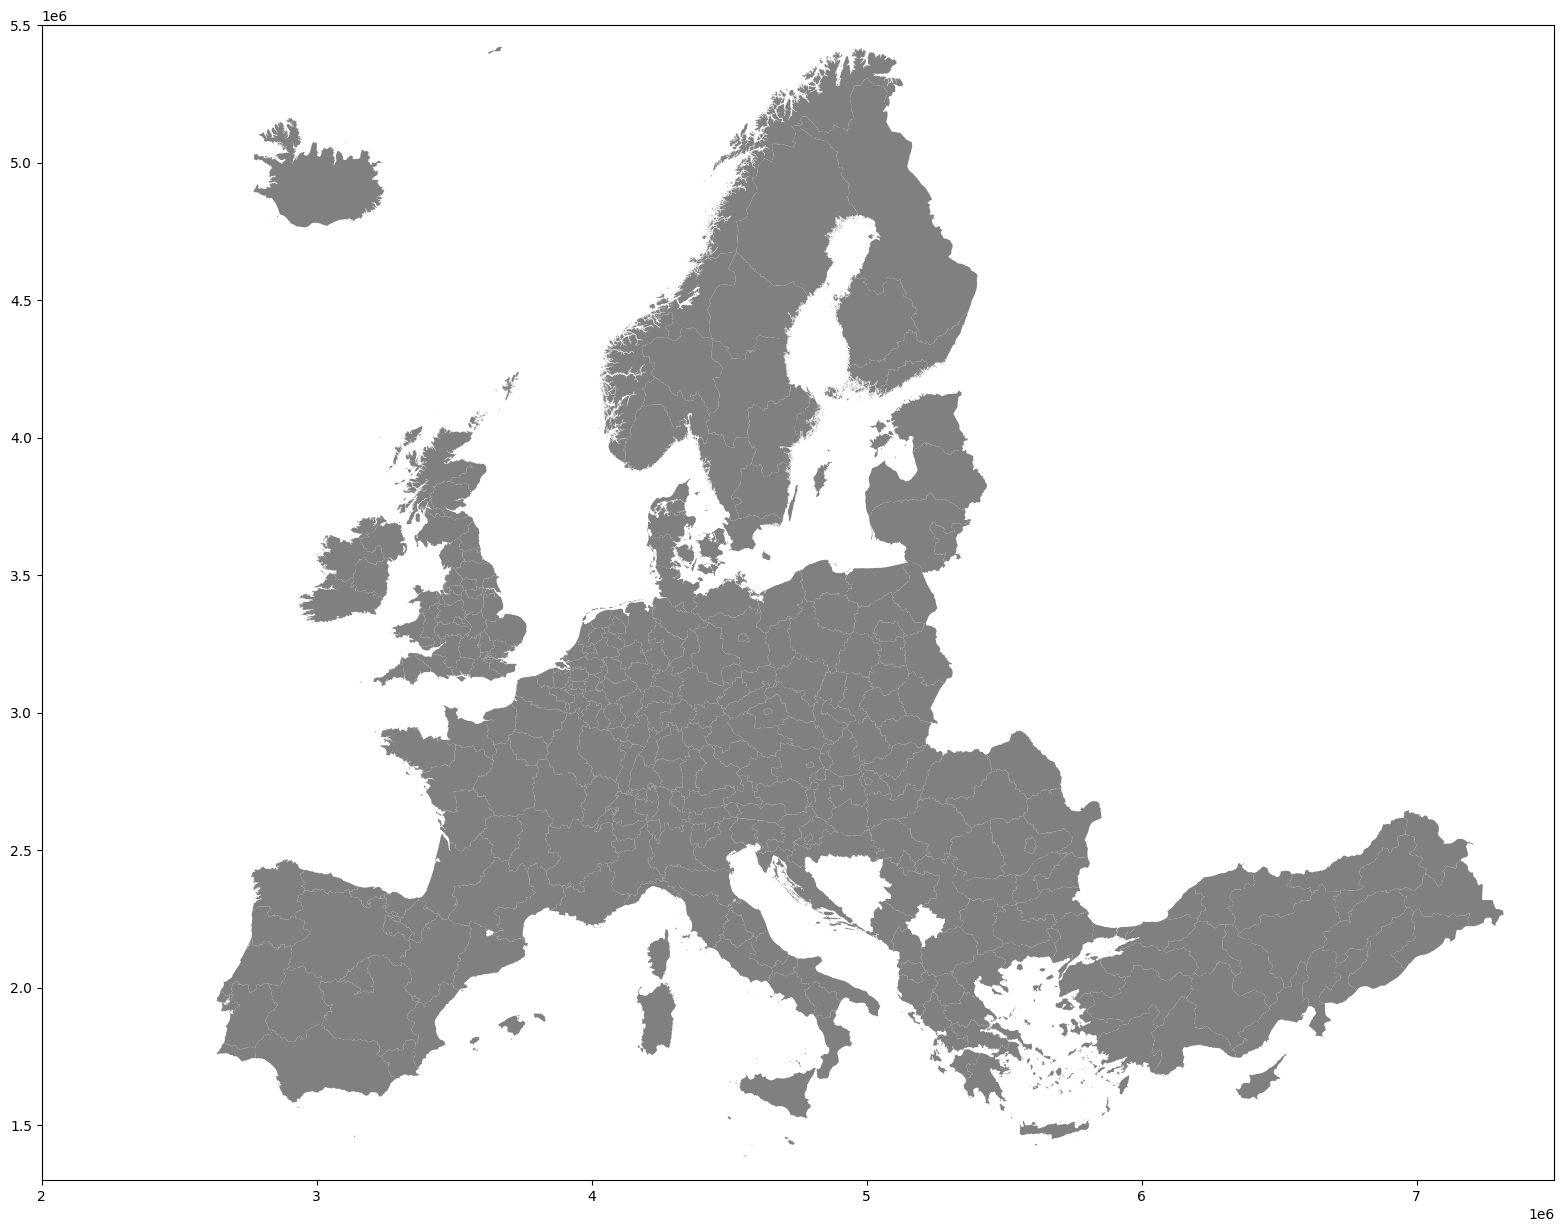

In [12]:
x_min, x_max = 2000000, 7500000    
y_min, y_max = 1300000, 5500000

fig, ax = plt.subplots(figsize=(20, 15))
tiles.plot(ax=ax, color='gray')

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

In [5]:
crimes_df = pd.read_csv("merged_crimes_and_poll.csv" )
crimes_df['2022'] = crimes_df['2022'].replace(':', '0')
crimes_df['2022'] = crimes_df['2022'].replace(np.nan, '0')
crimes_df = crimes_df[['NUTS_ID', '2022', '2021_y']]
scaler = MinMaxScaler()
crimes_df[['2022', '2021_y']] = scaler.fit_transform(crimes_df[['2022', '2021_y']])
crimes_df['algorithm'] = (5 * crimes_df['2022'].astype(float) + 3 * crimes_df['2021_y'])

C:\Users\dell\AppData\Local\Temp\ipykernel_10976\2849798026.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  crimes_df = pd.read_csv("merged_crimes_and_poll.csv" )


In [6]:
crimes_and_tiles = crimes_df.set_index('NUTS_ID')['algorithm'].to_dict()

In [59]:
tiles['algorithm'] = tiles['NUTS_ID'].map(crimes_and_tiles)
tiles[['algorithm']] = tiles[['algorithm']].astype(float) # convert string to float
tiles

,id,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,geometry,algorithm
0,DE12,DE12,2,DE,Karlsruhe,Karlsruhe,0.0,0,0,"MULTIPOLYGON (((4292250.627 2923816.233, 42898...",2.965352
1,CH05,CH05,2,CH,Ostschweiz,Ostschweiz,0.0,0,0,"MULTIPOLYGON (((4217100.716 2744026.981, 42176...",0.170768
2,CZ02,CZ02,2,CZ,Střední Čechy,Střední Čechy,0.0,0,0,"MULTIPOLYGON (((4685660.03 3058488.984, 468531...",0.511442
3,CH01,CH01,2,CH,Région lémanique,Région lémanique,0.0,0,0,"MULTIPOLYGON (((4075297.715 2643019.732, 40722...",0.168368
4,BE24,BE24,2,BE,Prov. Vlaams-Brabant,Prov. Vlaams-Brabant,0.0,0,0,"POLYGON ((3975410.912 3077942.789, 3974755.631...",0.465575
...,...,...,...,...,...,...,...,...,...,...,...
329,NO0A,NO0A,2,NO,Vestlandet,Vestlandet,0.0,0,0,"MULTIPOLYGON (((4272242.686 4363752.288, 42699...",0.446872
330,TR51,TR51,2,TR,Ankara,Ankara,0.0,0,0,"POLYGON ((6340989.45 2042486.896, 6340334.168 ...",3.242322
331,TR52,TR52,2,TR,"Konya, Karaman","Konya, Karaman",0.0,0,0,"POLYGON ((6340989.45 2042486.896, 6334775.193 ...",3.225528
332,HR05,HR05,2,HR,Grad Zagreb,Grad Zagreb,0.0,0,0,"POLYGON ((4798029.952 2559285.657, 4798248.379...",0.147395


(1300000.0, 5500000.0)

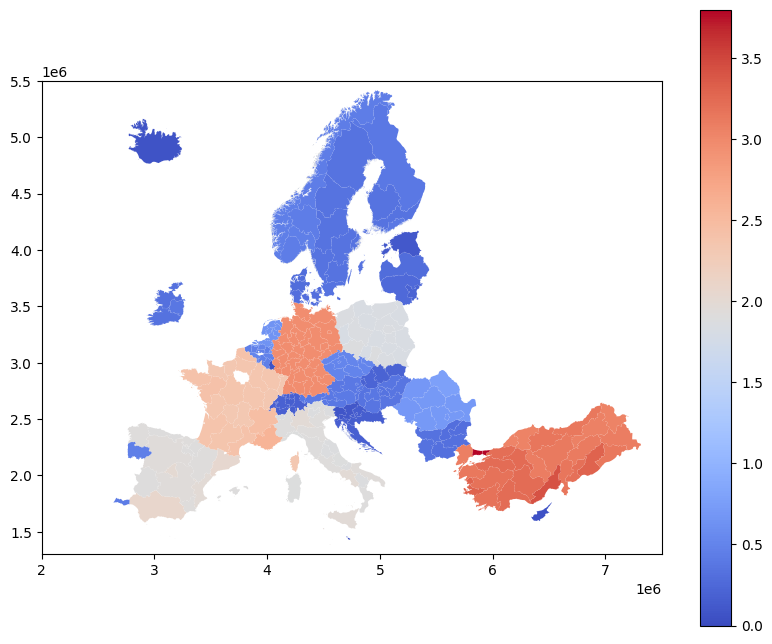

In [8]:
x_min, x_max = 2000000, 7500000    
y_min, y_max = 1300000, 5500000

_, ax = plt.subplots(figsize=(10, 8))
tiles.plot(ax=ax, column='algorithm', cmap='viridis', legend=True)

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

[('WAW', 156), ('FRA', 180), ('FRA', 180), ('MUC', 185), ('WAW', 133), ('WAW', 164), ('WAW', 164), ('MUC', 185), ('FRA', 202), ('AMS', 216)]
